In [128]:
import numpy as np 
import pandas as pd 

In [129]:
df = pd.read_csv('imu.csv')
df.head()

,Time,ax,ay
0,08:58:06.422,0.002,-0.0020
1,08:58:06.520,0.002,-0.0015
2,08:58:06.616,0.002,-0.0020
3,08:58:06.725,0.002,-0.0020
4,08:58:06.806,0.002,-0.0020


In [130]:
df.ax = df.ax * 9.8 
df.ay = df.ay * 9.8 
df.head()

,Time,ax,ay
0,08:58:06.422,0.0196,-0.0196
1,08:58:06.520,0.0196,-0.0147
2,08:58:06.616,0.0196,-0.0196
3,08:58:06.725,0.0196,-0.0196
4,08:58:06.806,0.0196,-0.0196


In [131]:
from datetime import datetime
df.head()

,Time,ax,ay
0,08:58:06.422,0.0196,-0.0196
1,08:58:06.520,0.0196,-0.0147
2,08:58:06.616,0.0196,-0.0196
3,08:58:06.725,0.0196,-0.0196
4,08:58:06.806,0.0196,-0.0196


In [132]:
df['Time']= df['Time'].apply(lambda x: datetime.strptime(x.strip(), '%H:%M:%S.%f'))
df['Time']

0     1900-01-01 08:58:06.422
1     1900-01-01 08:58:06.520
2     1900-01-01 08:58:06.616
3     1900-01-01 08:58:06.725
4     1900-01-01 08:58:06.806
                ...          
761   1900-01-01 08:59:22.329
762   1900-01-01 08:59:22.424
763   1900-01-01 08:59:22.524
764   1900-01-01 08:59:22.634
765   1900-01-01 08:59:22.744
Name: Time, Length: 766, dtype: datetime64[ns]

df.Time[0]

In [148]:
import math 
import matplotlib.pyplot as plt 

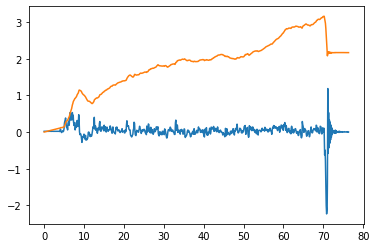

In [169]:
vxLast = 0 
vyLast = 0
pxLast = 0 
pyLast = 0 
 
lastT = 0 
Vmag =[]

timeStamp =[]
px = []
py = []
for idx , (currentT , currentAx, currentAy) in enumerate (zip(df.Time ,df.ax, df.ay)):
# for idx , data in enumerate (zip(df.Time ,df.ax, df.ay)):
    
    # currentT = datetime.strptime(currentT, '%H:%M:%S.%f')
    if idx != 0 :
        currentT = currentT.timestamp() - df.Time[0].timestamp()
    else: 
        currentT = 0     
    
    # print(currentT)
    timeStamp.append(currentT)
    dt = currentT - lastT
    vxCurrent = vxLast + float(currentAx) * dt
    vyCurrent = vyLast + float(currentAy) * dt
    
    pxCurrent = pxLast + vxCurrent *dt + float(currentAx) * (dt**2)
    pyCurrent = pyLast + vyCurrent *dt + float(currentAy) * (dt**2)
    
    Vmag.append(math.sqrt(vxCurrent**2 + vyCurrent**2))
    # vx.append(vxCurrent)
    # vy.append(vyCurrent)
    
    px.append(pxCurrent)
    py.append(pyCurrent)
    
    vxLast , vyLast ,pxLast , pyLast , lastT = vxCurrent , vyCurrent , pxCurrent , pyCurrent ,currentT
# timeTest = datetime.datetime(1900,1,1,0,0,0,0).timestamp()
# print(timeTest)
df['Vmag']= Vmag 
df['PosX'] = px
df['PosY'] = py 
df.head(100)
# plt.axis('equal')
df["Amag"] = [math.sqrt(i[0]**2 + i[1]**2) for i in zip(df.ax, df.ay)]

plt.plot(timeStamp,df.ax)
plt.plot(timeStamp,Vmag)